In [1]:
import librosa
#import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd
from scipy import signal

In [2]:
path = 'C:/Users/Lenovo/Desktop/'
um = '/s.wav'
#dois = '/2.wav'
x , sr = librosa.load(path+um)
#y, sr2 = librosa.load(path+dois)

In [10]:
r = [110.00, 123.47, 130.81, 146.83, 164.81, 185.00, 207.65, 220.0, 246.94, 261.62, 293.66, 329.62, 370.0, 415.3, 440]
[r[i] / r[i+1] for i in range(len(r)-1)]

[0.8909046731999676,
 0.9438880819509211,
 0.8908942314240959,
 0.8909046781141922,
 0.8908648648648648,
 0.8909222248976643,
 0.9438636363636363,
 0.8909046731999676,
 0.9438880819509211,
 0.8908942314240959,
 0.8909046781141922,
 0.8908648648648648,
 0.8909222248976643,
 0.9438636363636363]

In [11]:
x = np.concatenate([np.random.uniform(-0.01,0.01, 5000), x])
#y = np.concatenate([np.random.uniform(-0.01,0.01, 5000), y])


(0, 8)

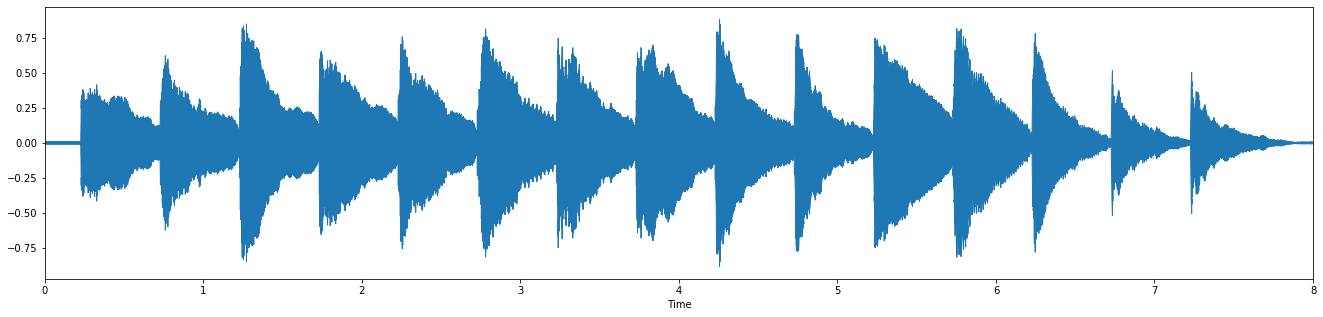

In [18]:
plt.figure(figsize=(50, 5))
plt.subplot(1, 2, 1)
librosa.display.waveplot(x, sr=sr)
plt.xlim(0, 8)

In [33]:
# Zooming in
n0 = 0 #chosse lower end
n1 = 44.1 #choose upper end in ms
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

TypeError: slice indices must be integers or None or have an __index__ method

<Figure size 1008x360 with 0 Axes>

In [6]:
#Zero crossing. Counts the number of times the signal crossed from 0 to 1 and back.
#This is done for a given window
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

216


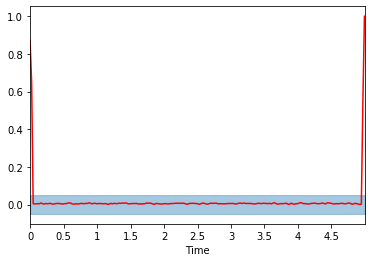

In [9]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')


(20, 216)


,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-335.316345,-401.990448,-715.730042,-715.726990,-715.728455,-715.728699,-715.726990,-715.726562,-715.727356,-715.727417,...,-715.730957,-715.727722,-715.729187,-715.728027,-715.729492,-715.729614,-715.730835,-715.726624,-466.401398,-340.476532
1,172.064651,173.198959,23.850250,23.853664,23.852360,23.851942,23.853874,23.854080,23.853104,23.853046,...,23.850163,23.853237,23.851868,23.852474,23.851576,23.851345,23.850067,23.853634,167.511932,165.445801
2,-44.664211,-45.229660,-12.132430,-12.131721,-12.131161,-12.131700,-12.131123,-12.131668,-12.132099,-12.132122,...,-12.130555,-12.131028,-12.130813,-12.132008,-12.130674,-12.130962,-12.131071,-12.132685,-40.926239,-39.886909
3,-39.549683,-41.473763,-37.978996,-37.981834,-37.979908,-37.980026,-37.981483,-37.982201,-37.981606,-37.981567,...,-37.977089,-37.980705,-37.979088,-37.980865,-37.978653,-37.978691,-37.977463,-37.982719,-47.066200,-43.390289
4,-33.452026,-35.051422,-32.621696,-32.627106,-32.625366,-32.624542,-32.627747,-32.627731,-32.626076,-32.625973,...,-32.622478,-32.626785,-32.624863,-32.625168,-32.624496,-32.624012,-32.622032,-32.626572,-33.910294,-30.952946
5,2.048464,1.991306,-0.786513,-0.791529,-0.791280,-0.789775,-0.792988,-0.792065,-0.790168,-0.790062,...,-0.790262,-0.792481,-0.791508,-0.789696,-0.791494,-0.790648,-0.789085,-0.789525,-0.333616,-0.275641
6,16.863091,18.458782,31.176598,31.175507,31.174210,31.175289,31.174427,31.175411,31.176155,31.176186,...,31.172993,31.174120,31.173582,31.175888,31.173283,31.173836,31.173882,31.177299,22.123806,19.076870
7,20.803282,22.694839,37.229877,37.234207,37.232483,37.232040,37.234715,37.234673,37.233387,37.233299,...,37.230209,37.233765,37.232155,37.232567,37.231831,37.231480,37.229774,37.233871,22.865349,19.322039
8,4.549989,5.220629,12.984760,12.992241,12.991377,12.989429,12.994237,12.993009,12.990290,12.990137,...,12.989595,12.993259,12.991648,12.989470,12.991567,12.990372,12.987921,12.989600,7.478196,6.323556
9,-7.520417,-8.625286,-21.146826,-21.141239,-21.140768,-21.142847,-21.139286,-21.140636,-21.142891,-21.143005,...,-21.141254,-21.139612,-21.140270,-21.143181,-21.140099,-21.141277,-21.142805,-21.144081,-11.315727,-9.170374


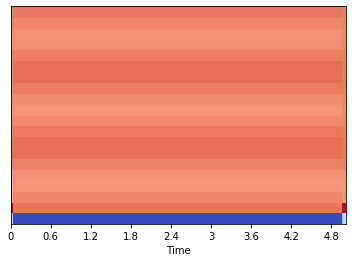

In [10]:
#MFCCs
mfccs = librosa.feature.mfcc(x, sr=sr)
mfccs2 = librosa.feature.mfcc(y, sr =sr2)
print(mfccs.shape) # by printing we get 1) how many MFCCS were calculated and 2) on how many frames 
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
pd.DataFrame(mfccs)

In [11]:
mfcc1 = librosa.feature.mfcc(y=x, sr=sr)[0]
mfcc2 = librosa.feature.mfcc(y=y, sr=sr2)[0]

In [10]:
#calculating different features
#chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
#spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
#spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
#rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
#zcr = librosa.feature.zero_crossing_rate(x)
#mfcc = librosa.feature.mfcc(y=x, sr=sr)[0]

In [12]:
#funcao recebe lista de musicas
def mfcc(lista_musicas, path):
    medias = []
    for i in lista_musicas:
        x , sr = librosa.load(f'{path}{i}')
        mfcc = librosa.feature.mfcc(y=x, sr=sr)[0]
        mfcc = np.mean(mfcc)
        medias.append(mfcc) 
    return medias



In [13]:
import os
musicas = os.listdir('C:/Users/Lenovo/Music/Pedro de Alcântara/Pedra Coração')[0:10]
path = 'C:/Users/Lenovo/Music/Pedro de Alcântara/Pedra Coração/'
mfcc_pedra_coracao = mfcc(musicas, path)
tracks = [i for i in range(len(mfcc_pedra_coracao))]
plt.plot(tracks, spectral_centroid)

KeyboardInterrupt: 

In [40]:
musicas = os.listdir('C:/Users/Lenovo/Music/Pedro de Alcântara/Onde Andará')[0:15]
path = 'C:/Users/Lenovo/Music/Pedro de Alcântara/Onde Andará/'
#mfcc_onde_andara = mfcc(musicas, path)
musicas

['01 Uma Barca Chamada Arca.wav',
 '02 Bichinho de Estimação.wav',
 '03 Onde Andará.wav',
 '04 Cabelo Na Cabeça.wav',
 '05 O Silêncio Em Forma De Canção.wav',
 '06 Kika.wav',
 '07 O Nome Dos Bichos.wav',
 '08 10 Amigos.wav',
 '09 Quero Saber.wav',
 '10 A Marcha Das Formigas.wav',
 '11 Cigarra Blues.wav',
 '12 Toda Criança.wav',
 '13 Silence.wav',
 '14 I Wonder Why.wav',
 '15 Grasshopper Blues.wav']

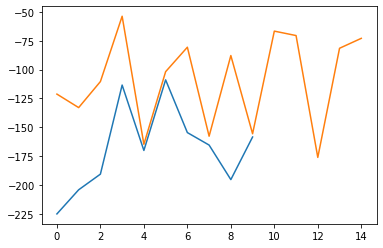

In [29]:
tracks2 = [i for i in range(len(mfcc_pedra_coracao))]
plt.plot(tracks2, mfcc_pedra_coracao)

tracks1 = [i for i in range(len(mfcc_onde_andara))]
plt.plot(tracks1, mfcc_onde_andara)
#plt.plot(tracks, mfcc_pedra_coracao)


In [51]:
def spc(lista_musicas, path):
    medias = []
    for i in lista_musicas:
        x , sr = librosa.load(f'{path}{i}')
        spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
        spectral_centroids = np.mean(spectral_centroids)
        medias.append(spectral_centroids) 
    return medias

spc_medias = spc(musicas, path)

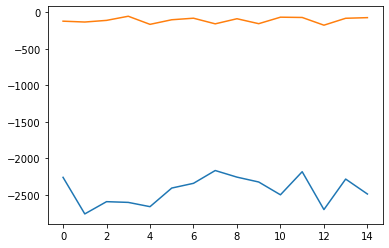

In [50]:
tracks1 = [i for i in range(len(mfcc_onde_andara))]
spc_medias = [i-2000 for i in spc_medias]
plt.plot(tracks1, spc_medias)
plt.plot(tracks1, mfcc_onde_andara)